In [1]:
import pandas as pd
import numpy as np
from src.dictionaries import features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
df = pd.read_csv('data/full_dataset.csv')
X = df.loc[:,features].values
y_recovery = df.loc[:,['recovery']] * 1
y_delta = df.loc[:,['delta']]
X_train, X_test, y_train, y_test = train_test_split(X, y_recovery, test_size=.2, random_state=7)


In [29]:
svd = TruncatedSVD()
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)
logisticRegr = LogisticRegression(solver = 'saga', max_iter = 1000)
logisticRegr.fit(X_train_svd, y_train.values.ravel())
logisticRegr.score(X_test_svd, y_test)


/home/cj/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.5693486590038315

In [18]:
X_train.shape

(5216, 2399)

In [22]:
svd.singular_values_

array([9.15363904e+07, 3.33637521e+06, 7.63479449e+01, 4.33691299e+01,
       1.26425169e+01, 9.27539179e+00, 7.57654160e+00, 7.01793215e+00,
       6.38171652e+00, 5.85775560e+00])

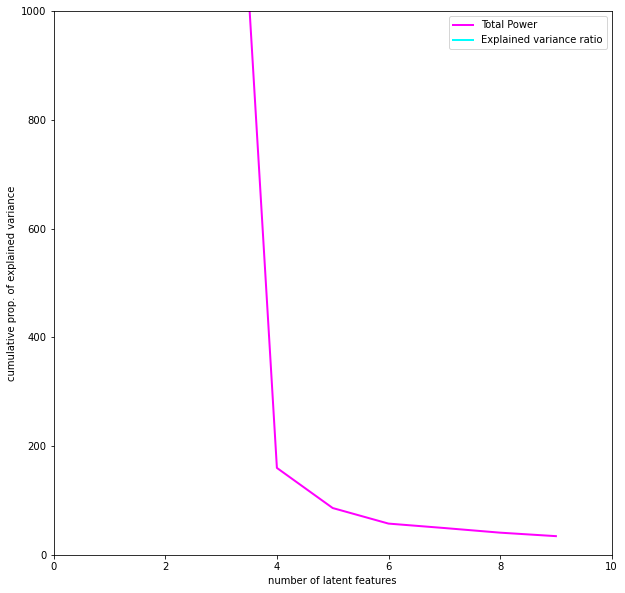

In [24]:
# total_variance = np.sum(svd.explained_variance_)
# cum_variance = np.cumsum(svd.explained_variance_)
# prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(10,10))
ax.plot((svd.singular_values_)*(svd.singular_values_), color='magenta', linewidth=2, label='Total Power')
# ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_xlabel('number of latent features')
ax.set_xlim(0,10)
ax.set_ylim(0,1000)
ax.legend();

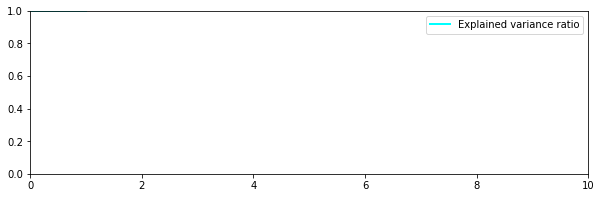

In [40]:
total_variance = np.sum(svd.explained_variance_)
cum_variance = np.cumsum(svd.explained_variance_)
prop_var_expl = cum_variance/total_variance
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(prop_var_expl, color='cyan', linewidth=2, label='Explained variance ratio')
# ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
# ax.set_ylabel('cumulative prop. of explained variance')
# ax.set_xlabel('number of latent features')
ax.set_xlim(0,10)
ax.set_ylim(0,1)
ax.legend();

array([1.])